In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pyvisa
import time
from matplotlib.animation import FuncAnimation

In [2]:
rm = pyvisa.ResourceManager()
rm.list_resources()
inst = rm.open_resource("ASRL11::INSTR")
inst.read_termination = '\n'
inst.write_termination = '\n'
print(inst.query("*IDN?"))

Lens driver


In [3]:
float(inst.query(":TEMP:PID:SET?")[:-1])

24.0

<IPython.core.display.Javascript object>


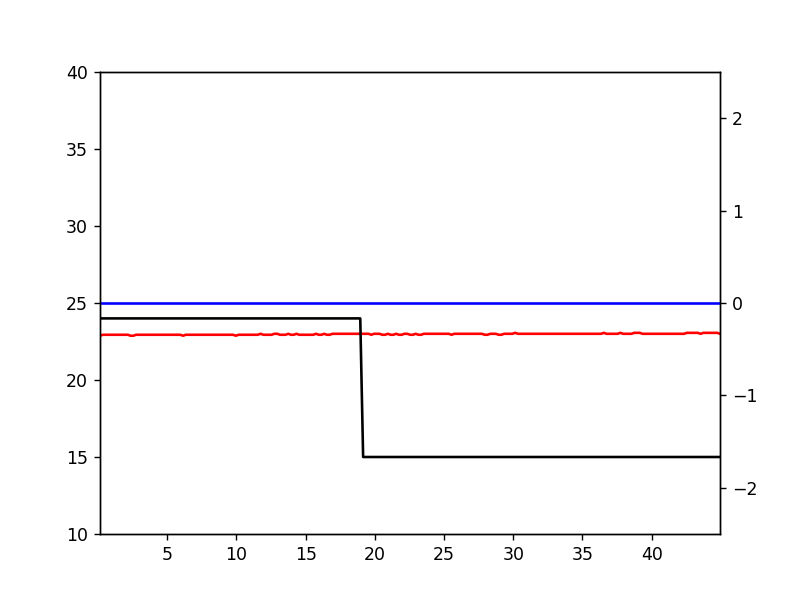

In [4]:
%matplotlib notebook
t0=time.time()

fig, ax = plt.subplots()
ax2=ax.twinx()
timedata, tempdata,setdata,outdata = [], [], [],[]
templn, = ax.plot([], [], 'r')
setln, = ax.plot([], [], 'k')
outln, = ax2.plot([],[],"b")

def update(frame):
    timedata.append(time.time()-t0)
    tempdata.append(float(inst.query(":TEMP:MEAS?")[:-1]))
    setdata.append(float(inst.query(":TEMP:PID:SET?")[:-1]))
    outdata.append(float(inst.query(":TEMP:PID:OUT?")[:-1]))
    templn.set_data(timedata, tempdata)
    setln.set_data(timedata, setdata)
    outln.set_data(timedata, outdata)
    plt.xlim(timedata[0],timedata[-1])
    return templn, setln,outln,

ani = FuncAnimation(fig, update, blit=True)
ax.set_ylim(10,40)
ax2.set_ylim(-2.5,2.5)
plt.show()

In [5]:
inst.write(":TEMP:PID:SET 15")

(17, <StatusCode.success: 0>)

In [8]:
time.time()

1595511728.1071255